<a href="https://colab.research.google.com/github/yongkyuns/temp/blob/master/manimcollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manim on google collab?
*Press ctrl f9 to run everything*

or 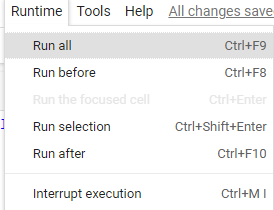

Like it? Paypal: juan3@yandex.com


why bother installing manim yourself when daddy google does it for you?

this section installs and configures manim and other globals

In [0]:
!git clone https://github.com/3b1b/manim.git

Cloning into 'manim'...
remote: Enumerating objects: 19819, done.
remote: Total 19819 (delta 0), reused 0 (delta 0), pack-reused 19819
Receiving objects: 100% (19819/19819), 16.64 MiB | 23.34 MiB/s, done.
Resolving deltas: 100% (14519/14519), done.


In [0]:
cd manim

/content/manim


In [0]:
!apt-get install -qqy --no-install-recommends \
        apt-utils \
        ffmpeg \
        sox \
        libcairo2-dev \
        texlive \
        texlive-fonts-extra \
        texlive-latex-extra \
        texlive-latex-recommended \
        texlive-science \
        tipa \

Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../00-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../01-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.8-2_all.deb ...
Unpacking poppler-data (0.4.8-2) ...
Selecting previously unselected package tex-common.
Preparing to unpack .../03-tex-common_6.09_all.deb ...
Unpacking tex-common (6.09) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../04-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previousl

In [0]:
!python setup.py sdist

     |████████████████████████████████| 112kB 2.8MB/s 
running sdist
[pbr] Writing ChangeLog
[pbr] Generating ChangeLog
[pbr] ChangeLog complete (0.1s)
[pbr] Generating AUTHORS
[pbr] AUTHORS complete (0.1s)
running egg_info
creating manimlib.egg-info
writing pbr to manimlib.egg-info/pbr.json
writing manimlib.egg-info/PKG-INFO
writing dependency_links to manimlib.egg-info/dependency_links.txt
writing entry points to manimlib.egg-info/entry_points.txt
writing requirements to manimlib.egg-info/requires.txt
writing top-level names to manimlib.egg-info/top_level.txt
[pbr] Processing SOURCES.txt
writing manifest file 'manimlib.egg-info/SOURCES.txt'
[pbr] In git context, generating filelist from git
writing manifest file 'manimlib.egg-info/SOURCES.txt'
[pbr] reno was not found or is too old. Skipping release notes
running check
creating manimlib-0.1.12.dev3
creating manimlib-0.1.12.dev3/.github
creating manimlib-0.1.12.dev3/docs
creating manimlib-0.1.12.dev3/docs/source
creating manimlib-0.1.

In [0]:
!python -m pip install dist/manimlib*

Processing ./dist/manimlib-0.1.12.dev3.tar.gz
     |████████████████████████████████| 215kB 6.3MB/s 
  Created wheel for manimlib: filename=manimlib-0.1.12.dev3-cp36-none-any.whl size=213292 sha256=b7486cce2e20e6b072770a01d83d6b8191e15871ac33620704fca6e7377de2bb
  Stored in directory: /root/.cache/pip/wheels/93/84/6b/2c275431832b3693bc8f7c8e00a4ba409fa4428ba755c8c7a9
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12074 sha256=956fc381e247f602233d55bd7e3415664af6231f5e49772202154598e5cb11a8
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
  Created wheel for pycairo: filename=pycairo-1.19.1-cp36-cp36m-linux_x86_64.whl size=241260 sha256=cdd893ad531698783bf9cf579c4e5ce5a6a3d0705640f76024e8f9561e36e08a
  Stored in directory: /root/.cache/pip/wheels/34/08/71/ef11d2526c2cb17a581088a89dfe1258f17c911e55ebde0550
Successfully built manimlib progressbar pycairo
  Found existing installation: manimlib 0.1.

In [0]:
#pip3 install -q jupyter-manim

In [0]:
# Copyright 2017 Google Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""Colab-specific file helpers."""

from __future__ import absolute_import as _
from __future__ import division as _
from __future__ import print_function as _

import base64 as _base64
import collections as _collections
import os as _os
import socket as _socket
import threading as _threading
import uuid as _uuid

import IPython as _IPython
import portpicker as _portpicker
import six as _six
from six.moves import SimpleHTTPServer as _SimpleHTTPServer
from six.moves import socketserver as _socketserver
from six.moves import urllib as _urllib

from google.colab import output as _output
from IPython.display import display, HTML
js = """<div id=\"put\">
<script>document.getElementById(\"put\").innerHTML=\"sup\"</script>
"""

def _get_unique_filename(filename):
  if not _os.path.lexists(filename):
    return filename
  counter = 1
  while True:
    path, ext = _os.path.splitext(filename)
    new_filename = '{} ({}){}'.format(path, counter, ext)
    if not _os.path.lexists(new_filename):
      return new_filename
    counter += 1


class _V6Server(_socketserver.TCPServer):
  address_family = _socket.AF_INET6


class _FileHandler(_SimpleHTTPServer.SimpleHTTPRequestHandler):
  """SimpleHTTPRequestHandler with a couple tweaks."""

  def translate_path(self, path):
    # Client specifies absolute paths.
    # TODO(b/79760241): Remove this spurious lint warning.
    return _urllib.parse.unquote(path)  # pylint:disable=too-many-function-args

  def log_message(self, fmt, *args):
    # Suppress logging since it's on the background. Any errors will be reported
    # via the handler.
    pass

  def end_headers(self):
    # Do not cache the response in the notebook, since it may be quite large.
    self.send_header('x-colab-notebook-cache-control', 'no-cache')
    _SimpleHTTPServer.SimpleHTTPRequestHandler.end_headers(self)


def download(filename):
  """Downloads the file to the user's local disk via a browser download action.
  Args:
    filename: Name of the file on disk to be downloaded.
  Raises:
    OSError: if the file cannot be found.
  """

  if not _os.path.exists(filename):
    msg = 'Cannot find file: {}'.format(filename)
    if _six.PY2:
      raise OSError(msg)
    else:
      raise FileNotFoundError(msg)  # pylint: disable=undefined-variable

  started = _threading.Event()
  port = _portpicker.pick_unused_port()

  def server_entry():
    httpd = _V6Server(('::', port), _FileHandler)
    started.set()
    # Handle a single request then exit the thread.
    httpd.handle_request()

  thread = _threading.Thread(target=server_entry)
  thread.start()
  started.wait()
  display(HTML( ("""
  <div id=\"put\">Wait for the video to load/download</div><script>
      (async function() {
        const response = await fetch('https://localhost:%(port)d%(path)s');
        if (!response.ok) {
          throw new Error('Failed to download: ' + response.statusText);
        }
        const blob = await response.blob();
        const a = document.createElement('a');
        a.href = window.URL.createObjectURL(blob);
        a.download = '%(name)s';
        a.innerHTML="download file here"
        document.getElementById("put").innerHTML=`<video width="960" height="720" controls>
  <source src="${a.href}" type="video/mp4">
</video>`
        document.getElementById("put").appendChild(a);
        //document.write(a);
        //a.click();
        //a.remove();
      })();
      </script>
  """ % {
      'port': port,
      'path': _os.path.abspath(filename),
      'name': _os.path.basename(filename),
  })))


In [0]:
from manimlib.utils.config_ops import DictAsObject
args=DictAsObject({"write_to_movie":False,"save_last_frame": False,
        "save_pngs": False,
        "save_as_gif": False,
        # If -t is passed in (for transparent), this will be RGBA
        "transparent": False,
        "file":"",
        "file_name":"repl",
        "scene_names": ["Demo"],
        "preview": False,
        "show_file_in_finder": False,
        "low_quality": False,
        "medium_quality": False,
        "high_quality": False,
        "resolution": None,
        "color":None,
        "quiet": False,
        "write_all": None,
        "start_at_animation_number": None,
        "end_at_animation_number": None,
        "sound": None,
        "leave_progress_bars": True,
        "media_dir": None,
        "video_dir": None,
        "video_output_dir": None,
        "tex_dir": None})

In [0]:
from manimlib.imports import *
import manimlib
import types
import argparse
import colour
import importlib.util
import os
import sys
from manimlib.utils.config_ops import DictAsObject
from manimlib.config import get_camera_configuration
import manimlib.constants
#module 

def render(scenes,args):
    module = types.ModuleType("input_scenes")
    exec("""from manimlib.imports import *""", module.__dict__)
    for v in scenes:
        setattr(module,v,scenes[v])
        getattr(module,v).__module__='input_scenes'

    file_writer_config = {
        # By default, write to file
        "write_to_movie": args.write_to_movie or not args.save_last_frame,
        "save_last_frame": args.save_last_frame,
        "save_pngs": args.save_pngs,
        "save_as_gif": args.save_as_gif,
        # If -t is passed in (for transparent), this will be RGBA
        "png_mode": "RGBA" if args.transparent else "RGB",
        "movie_file_extension": ".mov" if args.transparent else ".mp4",
        "file_name": args.file_name,
        "input_file_path": args.file,
    }
    if hasattr(module, "OUTPUT_DIRECTORY"):
        file_writer_config["output_directory"] = module.OUTPUT_DIRECTORY
    config = {
        "module": module,
        "scene_names": args.scene_names,
        "open_video_upon_completion": args.preview,
        "show_file_in_finder": args.show_file_in_finder,
        "file_writer_config": file_writer_config,
        "quiet": args.quiet or args.write_all,
        "ignore_waits": args.preview,
        "write_all": args.write_all,
        "start_at_animation_number": args.start_at_animation_number,
        "end_at_animation_number": None,
        "sound": args.sound,
        "leave_progress_bars": args.leave_progress_bars,
        "media_dir": args.media_dir,
        "video_dir": args.video_dir,
        "video_output_dir": args.video_output_dir,
        "tex_dir": args.tex_dir,
    }

    # Camera configuration
    config["camera_config"] = get_camera_configuration(args)

    # Arguments related to skipping
    stan = config["start_at_animation_number"]
    if stan is not None:
        if "," in stan:
            start, end = stan.split(",")
            config["start_at_animation_number"] = int(start)
            config["end_at_animation_number"] = int(end)
        else:
            config["start_at_animation_number"] = int(stan)

    config["skip_animations"] = any([
        file_writer_config["save_last_frame"],
        config["start_at_animation_number"],
    ])
    #if not kwargs["file"]:

    manimlib.constants.initialize_directories(config)
    manimlib.extract_scene.main(config)

# Running manim from collab
I called manim.py and just did it

In [0]:
class Demo(Scene):
    def construct(self):
        self.play(Write(TextMobject("hi")))

render({"Demo":Demo},args)
download("/content/manim/media/videos/1440p60/repl.mp4")

Media will be written to ./media/. You can change this behavior with the --media_dir flag.
Writing "\centering hi" to ./media/Tex/1990c497d048028b.tex
Writing "hi" to ./media/Tex/b64792dca5a72296.tex


Animation 0: WriteTextMobject: 100%|██████████| 60/60 [00:03<00:00, 15.07it/s]



File ready at /content/manim/media/videos/1440p60/repl.mp4

Played 1 animations
